In [238]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import scipy, pylab


df = pd.read_csv('database.csv')

In [239]:
df.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


In [193]:
df['Declaration Number'].value_counts()
filter_df = df.drop_duplicates(subset = ['Declaration Number'], keep = 'first')
filter_df['year'] = filter_df['Declaration Date'].apply(lambda x: x.split("/")[-1])


filter_df


C:\Users\hanna\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program,year
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes,1953
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes,1953
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes,1953
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes,1953
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes,1953
5,DR-6,Disaster,06/09/1953,MI,NaN,Tornado,Tornado,06/09/1953,06/09/1953,03/30/1956,Yes,No,Yes,Yes,1953
6,DR-7,Disaster,06/11/1953,MA,NaN,Tornado,Tornado,06/11/1953,06/11/1953,06/01/1956,Yes,No,Yes,Yes,1953
7,DR-8,Disaster,06/11/1953,IA,NaN,Flood,Flood,06/11/1953,06/11/1953,11/01/1955,Yes,No,Yes,Yes,1953
8,DR-9,Disaster,06/19/1953,TX,NaN,Flood,Flood,06/19/1953,06/19/1953,01/01/1958,Yes,No,Yes,Yes,1953
9,DR-11,Disaster,07/02/1953,NH,NaN,Fire,Forest Fire,07/02/1953,07/02/1953,02/01/1956,Yes,No,Yes,Yes,1953


In [194]:
unstack_df = filter_df.groupby(['Disaster Type', 'year']).count().State.unstack('year', fill_value=0).reset_index()
unstack_df.drop((unstack_df.index[0])).drop((unstack_df.index[13])).drop((unstack_df.index[5])).drop((unstack_df.index[6])).reset_index(drop=True)
unstack_df

year,Disaster Type,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Chemical,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,Dam/Levee Break,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Drought,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Earthquake,0,1,0,0,0,0,0,1,0,...,0,1,1,2,0,0,1,0,0,0
4,Fire,1,0,0,1,0,0,0,1,1,...,54,51,18,116,29,4,2,3,1,0
5,Flood,5,7,8,7,10,5,6,3,10,...,3,3,9,27,3,17,10,9,18,0
6,Human Cause,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Hurricane,0,7,7,2,2,1,1,2,1,...,16,1,5,29,29,2,0,0,10,0
8,Ice,0,0,0,0,0,0,0,0,0,...,3,8,1,0,0,1,9,3,0,0
9,Mud/Landslide,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,1,0


In [240]:
yearly_changes = filter_df.groupby('year')['Declaration Number'].count().reset_index()
time = yearly_changes.drop(yearly_changes.index[64])
time.head()

,year,Declaration Number
0,1953,13
1,1954,17
2,1955,18
3,1956,16
4,1957,16


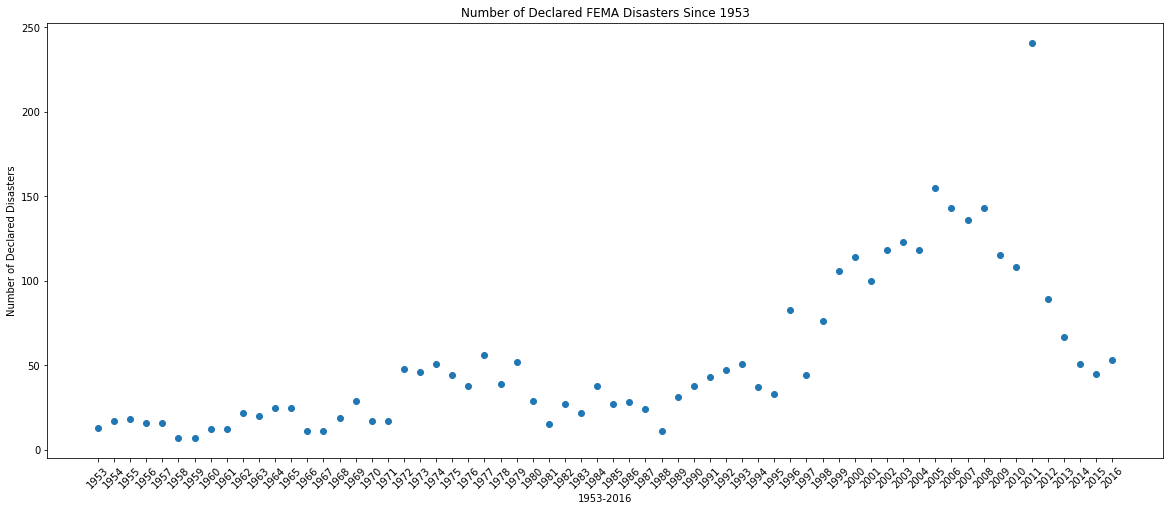

In [196]:
fig = plt.figure()
plt.figure(figsize=(20, 8))


plt.scatter(time['year'], time['Declaration Number'])
plt.xlabel("1953-2016")
plt.ylabel("Number of Declared Disasters")
plt.title("Number of Declared FEMA Disasters Since 1953")

plt.xticks(rotation=45)

plt.show()
plt.savefig('Increasingnumberofdisasters.png')



In [211]:
disaster_df = filter_df.groupby(['Disaster Type', 'year']).count().State.unstack('Disaster Type', fill_value=0).reset_index()
disaster_df.drop(disaster_df.index[64]).reset_index(drop=True).head()

Disaster Type,year,Chemical,Dam/Levee Break,Drought,Earthquake,Fire,Flood,Human Cause,Hurricane,Ice,...,Other,Snow,Storm,Terrorism,Tornado,Tsunami,Typhoon,Volcano,Water,Winter
0,1953,0,0,0,0,1,5,0,0,0,...,1,0,0,0,6,0,0,0,0,0
1,1954,0,0,0,1,0,7,0,7,0,...,1,0,0,0,1,0,0,0,0,0
2,1955,0,0,0,0,0,8,0,7,0,...,1,0,0,0,1,0,0,1,0,0
3,1956,0,0,0,0,1,7,0,2,0,...,1,0,3,0,2,0,0,0,0,0
4,1957,0,0,0,0,0,10,0,2,0,...,1,0,0,0,3,0,0,0,0,0


In [217]:
disaster_type = ['Hurricane', 'Tornado', 'Earthquake', 'Storm', 'Flood']

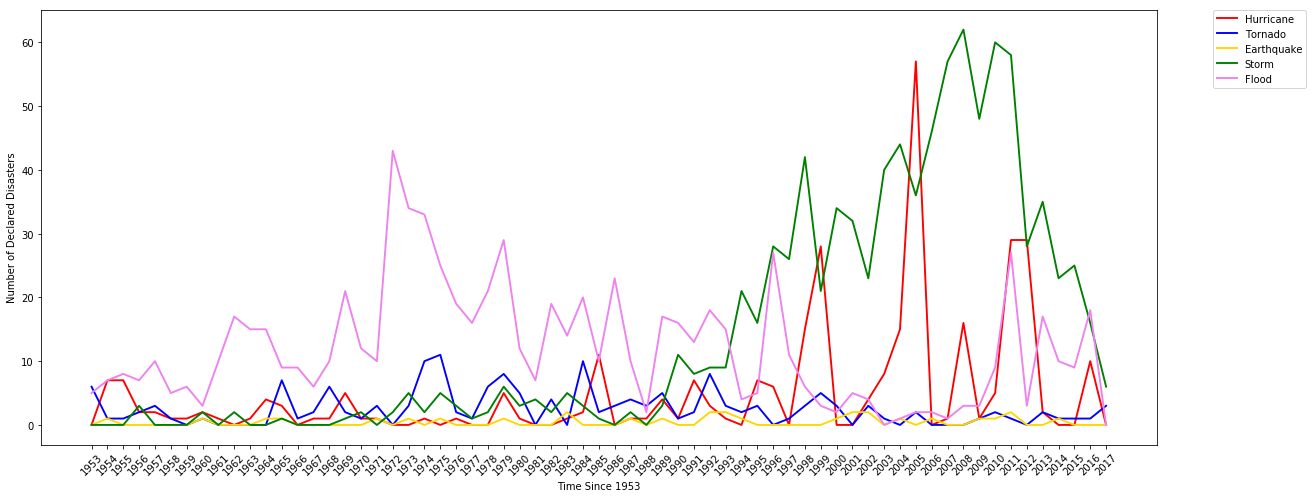

In [237]:
fig = plt.figure()
ax = fig.add_subplot(111) 

ax.plot(disaster_df['year'], disaster_df['Hurricane'], color = 'red', linewidth = 1.9) 
ax.plot(disaster_df['year'], disaster_df['Tornado'], color = 'blue', linewidth = 1.9) 
ax.plot(disaster_df['year'], disaster_df['Earthquake'], color = 'gold', linewidth = 1.9) 
ax.plot(disaster_df['year'], disaster_df['Storm'], color = 'green', linewidth = 1.9) 
ax.plot(disaster_df['year'], disaster_df['Flood'], color = 'violet', linewidth = 1.9)

pylab.rcParams['figure.figsize'] = (20, 8)
plt.legend((list(disaster_type)), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel("Time Since 1953")
plt.ylabel("Number of Declared Disasters")


plt.xticks(rotation=45)

plt.savefig('individual_disasters.png')
plt.show()

In [ ]:
new_df = disaster_df.groupby('Disaster Type')
hurricane = new_df.get_group('Hurricane')
tornado = new_df.get_group('Tornado')
earthquake = new_df.get_group('Earthquake')
storms = new_df.get_group('Storm')
flood = new_df.get_group('Flood')